Question1: Consider a scenario where you are faced with 3 slot machines,
each with different but unknown probabilities of returning a reward. You can
play a total of 100 rounds. Choose any multi-armed bandit algorithm you
have studied (e.g., ε-greedy, Upper Confidence Bound (UCB), Thompson
Sampling, or others) to decide which slot machine to play in each round.
Explain how your chosen algorithm helps balance exploration and
exploitation to maximize total rewards. Write a Python function to implement
your chosen algorithm. Assume the initial values of all slot machines are zero.

#  Epsilon-Greedy Algorithm

##  Overview
The **epsilon-greedy algorithm** is one of the simplest strategies for solving the **Multi-Armed Bandit (MAB)** problem.  
It helps balance **exploration** (trying new actions) and **exploitation** (choosing the best-known action).

---

##  Working Principle

- With **probability ϵ (epsilon)** → **Explore** a random slot.  
- With **probability (1 − ϵ)** → **Exploit** the slot with the highest estimated reward.

---

##  Algorithm Steps

1. **Initialize** the estimated values of all slot to zero or a small positive number.  
2. For each trial:
   - Generate a random number between 0 and 1.
   - If the number is **less than ϵ**, select a **random arm** (exploration).
   - Otherwise, select the **arm with the highest estimated reward** (exploitation).
   - **Update** the estimated reward of the selected arm based on the observed reward.

---

Epsilon=0.10 | Total Reward=12.44
Epsilon=0.20 | Total Reward=15.16
Epsilon=0.30 | Total Reward=9.43


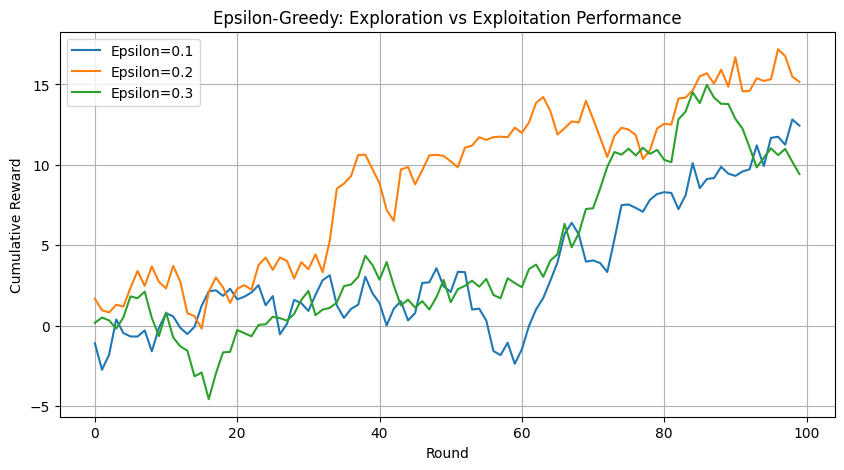

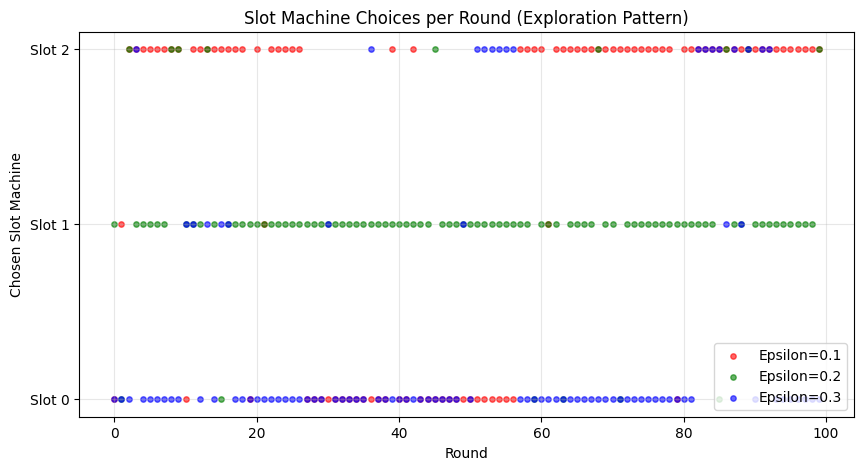

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  
        self.values = np.zeros(n_arms)  

    def select_arm(self):
        # Exploration vs Exploitation
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)  # explore
        else:
            return np.argmax(self.values)              # exploit

    def update(self, chosen_arm, reward):
        # Incremental mean update
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = value + (reward - value) / n


def run_bandit(n_arms=3, epsilon=0.1, n_trials=100):
    agent = EpsilonGreedy(n_arms, epsilon)
    rewards = np.random.randn(n_arms, n_trials)  # random reward distribution
    cumulative_rewards = []
    chosen_arms = []
    total_reward = 0

    for t in range(n_trials):
        arm = agent.select_arm()
        reward = rewards[arm, t]
        agent.update(arm, reward)
        chosen_arms.append(arm)
        total_reward += reward
        cumulative_rewards.append(total_reward)

    return cumulative_rewards, chosen_arms


# --- Run for different epsilon values ---
epsilons = [0.1, 0.2, 0.3]
n_trials = 100
n_arms = 3
all_cumulative_rewards = []
all_chosen_arms = []

for eps in epsilons:
    cumulative, arms = run_bandit(n_arms=n_arms, epsilon=eps, n_trials=n_trials)
    all_cumulative_rewards.append(cumulative)
    all_chosen_arms.append(arms)
    print(f"Epsilon={eps:.2f} | Total Reward={cumulative[-1]:.2f}")


# --- Plot 1: Cumulative Rewards ---
plt.figure(figsize=(10,5))
for idx, eps in enumerate(epsilons):
    plt.plot(all_cumulative_rewards[idx], label=f"Epsilon={eps}")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.title("Epsilon-Greedy: Exploration vs Exploitation Performance")
plt.legend()
plt.grid(True)
plt.show()


# --- Plot 2: Which Arm Was Chosen Each Round ---
plt.figure(figsize=(10,5))
colors = ['r', 'g', 'b']
for idx, eps in enumerate(epsilons):
    plt.scatter(range(n_trials), all_chosen_arms[idx], 
                s=15, color=colors[idx], alpha=0.6, label=f"Epsilon={eps}")
plt.yticks(range(3), ["Slot 0", "Slot 1", "Slot 2"])
plt.xlabel("Round")
plt.ylabel("Chosen Slot Machine")
plt.title("Slot Machine Choices per Round (Exploration Pattern)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Create a reward matrix

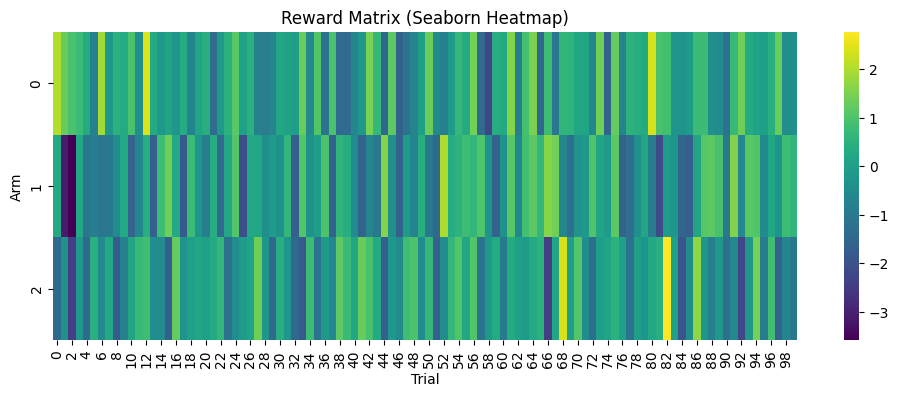

In [26]:
import seaborn as sns

# plot rewards matrix for n trials
plt.figure(figsize=(12, 4))
sns.heatmap(rewards, cmap='viridis', annot=False, cbar=True)
plt.xlabel("Trial")
plt.ylabel("Arm")
plt.title("Reward Matrix (Seaborn Heatmap)")
plt.show()


##### The ε-greedy algorithm balances exploration and exploitation by choosing a random arm with probability ε (exploration)
##### and the best-known arm with probability 1-ε (exploitation). This allows the agent to discover potentially better arms
##### while mostly exploiting the arm with the highest estimated reward. The implementation below starts with all slot machine
##### values initialized to zero and updates them as rewards are observed.

##### The EpsilonGreedy class below implements this algorithm for 3 slot machines over 100 rounds.

Total Reward (UCB): -2.376486756316242


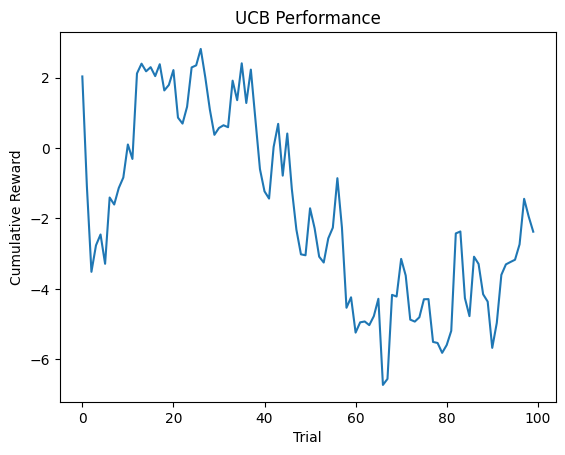

In [11]:
# with UCB
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Example usage and visualization
agent_ucb = UCB(n_arms)
total_reward_ucb = 0
cumulative_rewards_ucb = []

for t in range(n_trials):
    arm = agent_ucb.select_arm()
    reward = rewards[arm, t]
    agent_ucb.update(arm, reward)
    total_reward_ucb += reward
    cumulative_rewards_ucb.append(total_reward_ucb)

print("Total Reward (UCB):", total_reward_ucb)

plt.plot(np.arange(n_trials), cumulative_rewards_ucb)
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("UCB Performance")
plt.show()

Total Reward (Thompson Sampling): 5.04169866085266


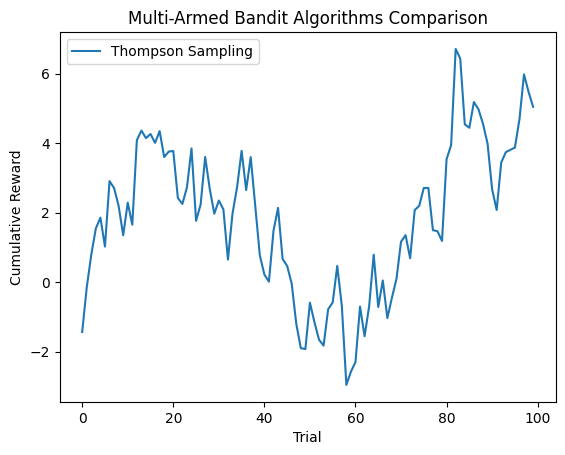

In [14]:
class ThompsonSampling:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.successes = np.zeros(n_arms)
        self.failures = np.zeros(n_arms)

    def select_arm(self):
        sampled_values = np.random.beta(self.successes + 1, self.failures + 1)
        return np.argmax(sampled_values)

    def update(self, chosen_arm, reward):
        if reward > 0:
            self.successes[chosen_arm] += 1
        else:
            self.failures[chosen_arm] += 1

# Visualization and comparison
agent_ts = ThompsonSampling(n_arms)
total_reward_ts = 0
cumulative_rewards_ts = []

for t in range(n_trials):
    arm = agent_ts.select_arm()
    reward = rewards[arm, t]
    agent_ts.update(arm, reward)
    total_reward_ts += reward
    cumulative_rewards_ts.append(total_reward_ts)

print("Total Reward (Thompson Sampling):", total_reward_ts)

plt.plot(np.arange(n_trials), cumulative_rewards_ts, label="Thompson Sampling")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Multi-Armed Bandit Algorithms Comparison")
plt.legend()
plt.show()

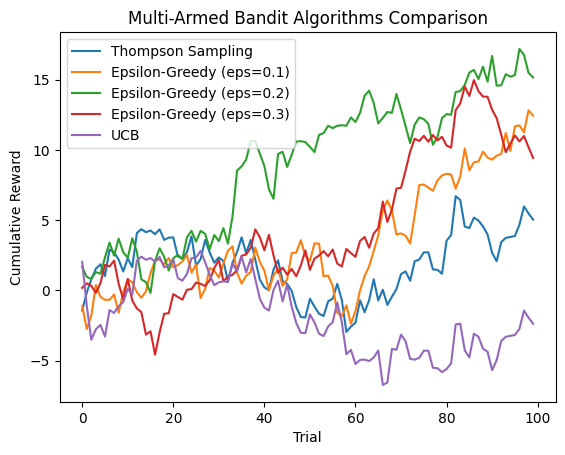

In [29]:
plt.plot(np.arange(n_trials), cumulative_rewards_ts, label="Thompson Sampling")
for idx, eps in enumerate(epsilons):
	plt.plot(np.arange(n_trials), all_cumulative_rewards[idx], label=f"Epsilon-Greedy (eps={eps})")
plt.plot(np.arange(n_trials), cumulative_rewards_ucb, label="UCB")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Multi-Armed Bandit Algorithms Comparison")
plt.legend()
plt.show()